In [358]:
import pandas as pd
import seaborn as sns
import numpy as np
df_train = pd.read_excel("Train_dataset.xlsx")
df_to_predict = pd.read_excel("Test_dataset.xlsx")

In [359]:
df_train.head()

,people_ID,Region,Gender,Designation,Name,Married,Children,Occupation,Mode_transport,cases/1M,Deaths/1M,comorbidity,Age,Coma score,Pulmonary score,cardiological pressure,Diuresis,Platelets,HBB,d-dimer,Heart rate,HDL cholesterol,Charlson Index,Blood Glucose,Insurance,salary,FT/month,Infect_Prob
0,1,Bhubaneshwar,Female,Mrs,mansi,YES,1.0,Farmer,Public,2,0,Hypertension,68,8,<400,Normal,441.0,154.0,93.0,233.0,82.0,58.0,27,7,3600000.0,1300000,2.0,49.135010
1,2,Bhubaneshwar,Female,Mrs,riya masi,YES,2.0,Farmer,Walk,2,0,Diabetes,64,15,<100,Stage-02,NaN,121.0,56.0,328.0,89.0,68.0,5,6,1600000.0,400000,1.0,51.147880
2,3,Bhubaneshwar,Female,Mrs,sunita,NO,1.0,Cleaner,Public,2,0,None,19,13,<300,Elevated,416.0,124.0,137.0,213.0,77.0,43.0,40,6,3400000.0,900000,1.0,73.224000
3,4,Bhubaneshwar,Female,Mrs,anjali @ babli,YES,1.0,Driver,Car,2,0,Coronary Heart Disease,33,9,<200,Stage-01,410.0,98.0,167.0,275.0,64.0,60.0,27,7,700000.0,2300000,1.0,48.779225
4,5,Bhubaneshwar,Female,Mrs,champa karketta,NO,2.0,Manufacturing,Car,2,0,Diabetes,23,7,<400,Normal,390.0,21.0,153.0,331.0,71.0,64.0,32,7,3200000.0,1100000,1.0,87.868800


In [360]:
df.shape

(10714, 9)

In [361]:
df_train.head()

,people_ID,Region,Gender,Designation,Name,Married,Children,Occupation,Mode_transport,cases/1M,Deaths/1M,comorbidity,Age,Coma score,Pulmonary score,cardiological pressure,Diuresis,Platelets,HBB,d-dimer,Heart rate,HDL cholesterol,Charlson Index,Blood Glucose,Insurance,salary,FT/month,Infect_Prob
0,1,Bhubaneshwar,Female,Mrs,mansi,YES,1.0,Farmer,Public,2,0,Hypertension,68,8,<400,Normal,441.0,154.0,93.0,233.0,82.0,58.0,27,7,3600000.0,1300000,2.0,49.135010
1,2,Bhubaneshwar,Female,Mrs,riya masi,YES,2.0,Farmer,Walk,2,0,Diabetes,64,15,<100,Stage-02,NaN,121.0,56.0,328.0,89.0,68.0,5,6,1600000.0,400000,1.0,51.147880
2,3,Bhubaneshwar,Female,Mrs,sunita,NO,1.0,Cleaner,Public,2,0,None,19,13,<300,Elevated,416.0,124.0,137.0,213.0,77.0,43.0,40,6,3400000.0,900000,1.0,73.224000
3,4,Bhubaneshwar,Female,Mrs,anjali @ babli,YES,1.0,Driver,Car,2,0,Coronary Heart Disease,33,9,<200,Stage-01,410.0,98.0,167.0,275.0,64.0,60.0,27,7,700000.0,2300000,1.0,48.779225
4,5,Bhubaneshwar,Female,Mrs,champa karketta,NO,2.0,Manufacturing,Car,2,0,Diabetes,23,7,<400,Normal,390.0,21.0,153.0,331.0,71.0,64.0,32,7,3200000.0,1100000,1.0,87.868800


In [362]:
# we have to Check for null values in the dataset
df_train.isnull().sum()

people_ID                    0
Region                       0
Gender                       0
Designation                  0
Name                        20
Married                      0
Children                   311
Occupation                 747
Mode_transport               3
cases/1M                     0
Deaths/1M                    0
comorbidity                226
Age                          0
Coma score                   0
Pulmonary score              0
cardiological pressure      97
Diuresis                   716
Platelets                  924
HBB                         16
d-dimer                   1114
Heart rate                1114
HDL cholesterol             35
Charlson Index               0
Blood Glucose                0
Insurance                 1090
salary                       0
FT/month                   723
Infect_Prob                  0
dtype: int64

In [363]:
print("Number of rows in training dataset",df_train.shape)
print("Number of rows in prediction dataset",df_to_predict.shape)

Number of rows in training dataset (10714, 28)
Number of rows in prediction dataset (14498, 27)


In [364]:
# noe lets check null column values
null_columns=df_train.columns[df_train.isnull().any()]
print(df_train[df_train.isnull().any(axis=1)][null_columns].head())

               Name  Children     Occupation Mode_transport  \
1         riya masi       2.0         Farmer           Walk   
6              iqra       2.0  Manufacturing            Car   
8     kalyani patro       2.0          Sales         Public   
12  karina @ kavita       NaN            NaN         Public   
14         subhadra       2.0  Manufacturing         Public   

               comorbidity cardiological pressure  Diuresis  Platelets    HBB  \
1                 Diabetes               Stage-02       NaN      121.0   56.0   
6   Coronary Heart Disease                 Normal       NaN       75.0  156.0   
8             Hypertension               Stage-01     310.0        NaN  156.0   
12                Diabetes               Stage-01     403.0       39.0  174.0   
14  Coronary Heart Disease               Stage-01     382.0        NaN   24.0   

    d-dimer  Heart rate  HDL cholesterol  Insurance  FT/month  
1     328.0        89.0             68.0  1600000.0       1.0  
6     

In [365]:
# hey now drop null column values
df_train.dropna(inplace=True)

In [366]:
# we are going to select duplicate rows except first occurrence based on all columns
duplicateRowsDF = df_train[df_train.duplicated()]
print("Total Duplicate Rows except first occurrence based on all columns are :")
duplicateRowsDF.shape

Total Duplicate Rows except first occurrence based on all columns are :


(0, 28)

In [367]:
df_train.isnull().sum()

people_ID                 0
Region                    0
Gender                    0
Designation               0
Name                      0
Married                   0
Children                  0
Occupation                0
Mode_transport            0
cases/1M                  0
Deaths/1M                 0
comorbidity               0
Age                       0
Coma score                0
Pulmonary score           0
cardiological pressure    0
Diuresis                  0
Platelets                 0
HBB                       0
d-dimer                   0
Heart rate                0
HDL cholesterol           0
Charlson Index            0
Blood Glucose             0
Insurance                 0
salary                    0
FT/month                  0
Infect_Prob               0
dtype: int64

In [368]:
# now clerly remove duplicate rows in training dataset
df_train.drop_duplicates(keep='first',inplace=True)

In [369]:
# lets See values in columns of dataset 
df_to_predict.head()

,people_ID,Region,Gender,Designation,Name,Married,Children,Occupation,Mode_transport,cases/1M,Deaths/1M,comorbidity,Age,Coma score,Pulmonary score,cardiological pressure,Diuresis,Platelets,HBB,d-dimer,Heart rate,HDL cholesterol,Charlson Index,Blood Glucose,Insurance,salary,FT/month
0,5942,Delhi,Female,Mrs,smt rekha prajapat,YES,2,Driver,Public,4,1,Diabetes,52,3,<200,Stage-01,388,153,196,240,85,53,17,3,3900000,1300000,1
1,18664,Delhi,Male,Mr,nirmal,YES,2,Legal,Walk,4,1,Diabetes,53,11,<200,Stage-01,409,95,138,241,81,61,2,5,1800000,1300000,1
2,5603,Delhi,Female,Mrs,pinky,YES,2,Sales,Car,4,1,Diabetes,35,9,<100,Stage-02,440,40,166,236,88,47,24,3,5000000,2000000,2
3,5649,Delhi,Female,Mrs,pooja @aafrin,YES,2,Sales,Car,4,1,None,31,12,<300,Elevated,206,78,83,211,87,52,13,6,3100000,600000,2
4,5099,Delhi,Female,Mrs,anjali,YES,2,Business,Car,4,1,Diabetes,51,6,<200,Stage-01,229,109,207,312,94,68,39,5,2300000,1500000,1


In [370]:
pd.set_option('display.max_columns',None)
df_train.head()


,people_ID,Region,Gender,Designation,Name,Married,Children,Occupation,Mode_transport,cases/1M,Deaths/1M,comorbidity,Age,Coma score,Pulmonary score,cardiological pressure,Diuresis,Platelets,HBB,d-dimer,Heart rate,HDL cholesterol,Charlson Index,Blood Glucose,Insurance,salary,FT/month,Infect_Prob
0,1,Bhubaneshwar,Female,Mrs,mansi,YES,1.0,Farmer,Public,2,0,Hypertension,68,8,<400,Normal,441.0,154.0,93.0,233.0,82.0,58.0,27,7,3600000.0,1300000,2.0,49.135010
2,3,Bhubaneshwar,Female,Mrs,sunita,NO,1.0,Cleaner,Public,2,0,None,19,13,<300,Elevated,416.0,124.0,137.0,213.0,77.0,43.0,40,6,3400000.0,900000,1.0,73.224000
3,4,Bhubaneshwar,Female,Mrs,anjali @ babli,YES,1.0,Driver,Car,2,0,Coronary Heart Disease,33,9,<200,Stage-01,410.0,98.0,167.0,275.0,64.0,60.0,27,7,700000.0,2300000,1.0,48.779225
4,5,Bhubaneshwar,Female,Mrs,champa karketta,NO,2.0,Manufacturing,Car,2,0,Diabetes,23,7,<400,Normal,390.0,21.0,153.0,331.0,71.0,64.0,32,7,3200000.0,1100000,1.0,87.868800
5,6,Bhubaneshwar,Female,Mrs,sandhya,YES,1.0,Clerk,Public,2,0,None,35,9,<100,Stage-02,389.0,139.0,86.0,216.0,94.0,38.0,5,5,4600000.0,1900000,2.0,49.518345


# lets clean the data

In [371]:
df_to_predict["Designation"].value_counts()




Mr     7392
Mrs    7106
Name: Designation, dtype: int64

In [372]:
df_train.Designation.replace(['Mr','Mrs'], [0,1], inplace=True)
df_to_predict.Designation.replace(['Mr','Mrs'], [0,1], inplace=True)
df_train["Designation"] = df_train["Designation"].astype(int)
df_to_predict["Designation"] = df_to_predict["Designation"].astype(int)


In [373]:
df_train["Designation"].value_counts()

1    3402
0    3375
Name: Designation, dtype: int64

In [374]:
df_to_predict["Gender"].value_counts()


Male      7392
Female    7106
Name: Gender, dtype: int64

In [375]:
df_train.Gender.replace(['Male','Female'], [0,1], inplace=True)
df_to_predict.Gender.replace(['Male','Female'], [0,1], inplace=True)
df_train["Gender"] = df_train["Gender"].astype(int)
df_to_predict["Gender"] = df_to_predict["Gender"].astype(int)


In [376]:
df_train["Gender"].value_counts()

1    3402
0    3375
Name: Gender, dtype: int64

In [377]:
df_to_predict["Married"].value_counts()


YES    11487
NO      3011
Name: Married, dtype: int64

In [378]:
df_train.Married.replace(['YES','NO'], [1,0], inplace=True)
df_to_predict.Married.replace(['YES','NO'], [1,0], inplace=True)
df_train["Married"] = df_train["Married"].astype(int)
df_to_predict["Married"] = df_to_predict["Married"].astype(int)


In [379]:
df_train["Married"].value_counts()

1    5260
0    1517
Name: Married, dtype: int64

In [380]:
df_to_predict["Occupation"].value_counts()


Researcher       1705
Sales            1638
Driver           1621
Clerk            1620
Business         1611
Farmer           1591
Cleaner          1586
Legal            1563
Manufacturing    1563
Name: Occupation, dtype: int64

In [381]:
df_train.Occupation.replace(['Legal','Farmer','Researcher','Manufacturing','Cleaner','Driver','Sales','Clerk','Business'], [7,5,0,8,6,2,1,3,4], inplace=True)
df_to_predict.Occupation.replace(['Researcher','Sales','Driver','Clerk','Business','Farmer','Cleaner','Legal','Manufacturing'], [0,1,2,3,4,5,6,7,8], inplace=True)
df_train["Occupation"] = df_train["Occupation"].astype(int)
df_to_predict["Occupation"] = df_to_predict["Occupation"].astype(int)


In [382]:
df_train["Occupation"].value_counts()

7    795
5    786
0    772
8    769
6    751
2    738
1    732
3    721
4    713
Name: Occupation, dtype: int64

In [383]:
df_to_predict["Region"].value_counts()


Pune                  2503
Thiruvananthapuram    2502
Kolkata               2483
Mumbai                2475
Hyderabad             2457
Delhi                 2078
Name: Region, dtype: int64

In [ ]:
df_train.Region.replace(['Bengaluru','Chandigarh','Bhubaneshwar','Chennai','Delhi',], [0,1,2,3,4], inplace=True)
df_to_predict.Region.replace(['Pune','Thiruvananthapuram','Kolkata',''], [1,0], inplace=True)
df_train["Region"] = df_train["Region"].astype(int)
df_to_predict["Region"] = df_to_predict["Region"].astype(int)

In [390]:
df_train["Region"].value_counts()

Bengaluru       1661
Chandigarh      1658
Bhubaneshwar    1627
Chennai         1606
Delhi            225
Name: Region, dtype: int64

In [384]:
df_to_predict["Mode_transport"].value_counts()


Car       4880
Walk      4834
Public    4784
Name: Mode_transport, dtype: int64

In [385]:
df_train.Mode_transport.replace(['Walk','Public','Car'], [1,2,0], inplace=True)
df_to_predict.Mode_transport.replace(['Car','Walk','Public'], [0,1,2], inplace=True)
df_train["Mode_transport"] = df_train["Mode_transport"].astype(int)
df_to_predict["Mode_transport"] = df_to_predict["Mode_transport"].astype(int)


In [386]:
df_train["Mode_transport"].value_counts()

1    2338
2    2229
0    2210
Name: Mode_transport, dtype: int64

In [389]:
df_train=df_train.drop(['Name',"people_ID",'comorbidity','cardiological pressure',],axis=1)
df_to_predict=df_to_predict.drop(['Name',"people_ID",'Region','comorbidity','cardiological pressure'],axis=1)

In [ ]:
df_train

In [ ]:
# We created X and y columns for training dataset while y column for dataset to predict will
# be generated by our model in final step
X = df_train.drop(["Infect_Prob"], axis=1)
#y = np.log1p(df_train['Infect_prob'])
y = df_train["Infect_Prob"]
X_to_predict = df_to_predict

In [ ]:
X.head()

In [ ]:
#Separate categorical and numerical columns in dataframe
X_categorical = X.select_dtypes(exclude=['int', 'float'])
X_numerical = X.select_dtypes(include=['int', 'float'])

X_to_predict_categorical = X_to_predict.select_dtypes(exclude=['int', 'float'])
X_to_predict_numerical = X_to_predict.select_dtypes(include=['int', 'float'])

In [ ]:
# Check if categorical columns are assigned properly
X_categorical.head()

#Create a back up copy specifically for plotting graphs
X_numerical_graph = X_numerical.copy()
X_categorical_graph = X_categorical.copy()

In [ ]:
#Check if numerical columns are assigned properly
X_categorical.shape

In [ ]:
X_numerical.head()

In [ ]:
X_numerical.shape

In [ ]:
#Label encode and hot encode categorical columns
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X_categorical = X_categorical.apply(LabelEncoder().fit_transform)
X_to_predict_categorical = X_to_predict_categorical.apply(LabelEncoder().fit_transform)

In [ ]:
#Check values after label encoding
X_categorical.head()

In [ ]:
# Check the skew of all numerical features
from scipy.stats import skew
skewed_feats = X_numerical.apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
print("\nSkew in numerical features: \n")
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness.head(10)
skewness = skewness[abs(skewness) > 0.75]
print("There are {} skewed numerical features to Box Cox transform".format(skewness.shape[0]))

In [ ]:
#Merge categorical and numerical columns back into respective X and X_to_predict
X = pd.concat([X_categorical, X_numerical], axis=1)
X_to_predict = pd.concat([X_to_predict_categorical, X_to_predict_numerical], axis=1)

In [ ]:
#Check shape of all three to verify that merge was done properly in above step
print(X.shape, X_numerical.shape, X_categorical.shape)
print(X_to_predict.shape, X_to_predict_numerical.shape, X_to_predict_categorical.shape)
print(y.shape)

In [447]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
import numpy as np
from sklearn.metrics import mean_squared_log_error
# We have created a function to print accuracy metrics which can be used
# to get accuracy metrics of all models in upcoming steps
def print_accuracy_report(y_test, y_pred,X_test, model):
    print('R Squared(Accuracy)', metrics.r2_score(y_test, y_pred))   
    print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
    print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
    print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
    print('Root Mean Squared Log Error',np.sqrt(mean_squared_log_error( y_test, y_pred )))

In [448]:
# now lets try LinearRegressionModel
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
def LinearRegressionModel(X,y):
    X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=42, test_size=0.3)
    regressor = LinearRegression()  
    regressor.fit(X_train, y_train)
    y_pred = regressor.predict(X_test)
    print(print_accuracy_report(y_test, y_pred, X_test, regressor))
    return regressor
linearModel = LinearRegressionModel(X,y)

R Squared(Accuracy) 0.2838583898352073
Mean Absolute Error: 4.854759440751334
Mean Squared Error: 90.32772353227921
Root Mean Squared Error: 9.504089831871289
Root Mean Squared Log Error 0.16096380915494474
None


In [ ]:
# we have created a function to generate linear regression model
# which can then be called again after feature selection or other steps
from sklearn.linear_model import BayesianRidge
from sklearn.metrics import accuracy_score
def BayesianRidgeModel(X,y):
    X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=42, test_size=0.3)
    regressor = BayesianRidge()  
    regressor.fit(X_train, y_train)
    y_pred = regressor.predict(X_test)
    print(print_accuracy_report(y_test, y_pred, X_test, regressor))
    return regressor
linearModel = BayesianRidgeModel(X,y)

In [ ]:
#similarly define a function for random forest regressor
from sklearn.ensemble import RandomForestRegressor
def RandomForestRegressorModel(X,y):
    X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=42, test_size=0.3)
    rf = RandomForestRegressor(random_state=42)
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_test)
    print(print_accuracy_report(y_test, y_pred, X_test, rf))
    return rf
randomForestModel = RandomForestRegressorModel(X,y)

In [ ]:
# get feature importances from a model
import matplotlib.pyplot as plt
def plotFeatureImportances(model):
    #first print all features importances in descending order
    feature_importances = pd.DataFrame(model.feature_importances_,
                                   index = X.columns,
                                    columns=['importance']).sort_values('importance',ascending=False)
    print(feature_importances)
    # Next plot feature importances to get idea about where the curve breaks
    # in the graph i.e. select top appropriate features
    features = X.columns.tolist()
    importances = model.feature_importances_
    indices = np.argsort(importances)
    plt.title('Feature Importances')
    plt.barh(range(len(indices)), importances[indices], color='b', align='center')
    plt.yticks(range(len(indices)), [features[i] for i in indices])
    plt.xlabel('Relative Importance')
    plt.show()

                 importance
Age                0.288254
d-dimer            0.071301
HBB                0.059459
Diuresis           0.057692
HDL cholesterol    0.053866
Heart rate         0.053043
Platelets          0.048765
Charlson Index     0.047797
salary             0.040581
Children           0.040344
Insurance          0.040324
Coma score         0.035706
Occupation         0.031626
cases/1M           0.025506
Blood Glucose      0.024484
Deaths/1M          0.021917
Pulmonary score    0.018009
Mode_transport     0.015979
FT/month           0.014984
Gender             0.004024
Designation        0.003946
Married            0.002391


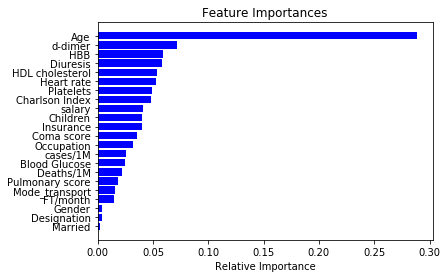

In [388]:
plotFeatureImportances(randomForestModel)